In [1]:
# Will start by importing the libraries I will need for this assigment

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import math 

In [2]:
# 1. Load the scikit-learn version of the diabetes dataset into your Jupyter
# notebook using the load_diabetes function.

diabetes = load_diabetes()

In [3]:
# Check the description

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
# 2. Split the dataset into the training and test sets. You may use the function
# train_test_split in scikit-learn. Here and below use your birthday
# (in the format DDMM omitting leading zeros if any) as random_state.

# Split the data
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
diabetes.target, random_state=2509)
# Check the splitted data
print(X_train.shape)
print(X_test.shape)

(331, 10)
(111, 10)


In [5]:
# 3. What is the training and test R2
# for the Lasso model using the default
# parameters? How many features does this model use? What are the names
# of those features? Write the answers in your Jupyter notebook. Here and
# below, you are allowed to use any scikit-learn functions


# There are different ways to perform this, default alpha=1

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [6]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.35126501039731695
test score:  0.3776703390961572
number of features used:  3


In [7]:
# As we can see, this model is using 3 features

num_coef=np.sum(lasso.coef_!=0)
print(num_coef)
lasso.coef_

3


array([  0.        ,  -0.        , 409.05499972,   2.0440825 ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       272.51825049,   0.        ])

In [8]:
# If we normalize it

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
# transform data

X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling

print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))


(331, 10)
[-0.10722563 -0.04464164 -0.08488624 -0.10895673 -0.12678067 -0.11279473
 -0.09862541 -0.0763945  -0.10436482 -0.13776723]
[0.11072668 0.05068012 0.17055523 0.13204422 0.15253776 0.19878799
 0.17749742 0.18523444 0.13359898 0.13561183]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
# transform test data- not sure if this needs performed

X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling

print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[ 0.          0.         -0.02109705 -0.01428571  0.06403941 -0.00904523
 -0.01333333  0.         -0.09132719  0.16666667]
[1.         1.         0.86919831 0.9        1.00492611 0.86231156
 1.01333333 0.70521862 0.99484657 0.89393939]


In [13]:
# Different way to calculate s the training and test R2
# for the Lasso model using the default
# parameter

# As we can see the value is the same for un-normalized and normalized data

lasso1 = Lasso(alpha=1, max_iter=10e5)
lasso1.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
train_score1=lasso1.score(X_train,y_train)
test_score1=lasso1.score(X_test,y_test)
coeff_used1 = np.sum(lasso1.coef_!=0)
print ("training score for alpha=1:", train_score1)
print ("test score for alpha =1: ", test_score1)
print ("number of features used: for alpha =1:", coeff_used1)

training score for alpha=1: 0.35126501039731695
test score for alpha =1:  0.3776703390961572
number of features used: for alpha =1: 3


In [16]:
# let's check linear regression values

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

print(regr.coef_)

[ -37.6457136  -283.52963516  544.88293088  326.40352249 -711.97585107
  410.18288208   51.77074959  179.72520537  697.90581641   50.91481612]


In [17]:
# 4. Now load the original diabetes dataset

from pandas import read_csv
diabetes = read_csv('diabetes.txt', sep = '\t')
data = diabetes.values

In [18]:
diabetes.head()

,GE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [19]:
# 5. Split the dataset into the training and test sets. Use your birthday (in the
# format DDMM) as random_state.

X,y=data[:, :10], data[:,-10]    

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2509)

In [64]:
print(X_train.shape)
print(X_test.shape)

(331, 10)
(111, 10)


In [20]:
# 6. Repeat item 3 for the current dataset. Comment on the differences from
# what you saw in item 3.

lasso1 = Lasso(alpha=1, max_iter=10e5)
lasso1.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
train_score1=lasso1.score(X_train,y_train)
test_score1=lasso1.score(X_test,y_test)
coeff_used1 = np.sum(lasso1.coef_!=0)
print ("training score for alpha=1:", train_score1)
print ("test score for alpha =1: ", test_score1)
print ("number of features used: for alpha =1:", coeff_used1)

training score for alpha=1: 0.11799392902411987
test score for alpha =1:  0.16007808445922678
number of features used: for alpha =1: 3


In [22]:
# The training and test score decreased by more than half 
# The number of features is still the same

num_coef=np.sum(lasso.coef_!=0)
print(num_coef)
lasso.coef_

3


array([  0.        ,  -0.        , 409.05499972,   2.0440825 ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       272.51825049,   0.        ])

In [23]:
# Just to check linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [24]:
print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

LR training score: 1.0
LR test score:  1.0


In [29]:
# 7. Preprocess the training and test sets in the same way and avoiding data
# snooping.
# Use StandardScaler.

from sklearn.preprocessing import StandardScaler

X,y=data[:, :10], data[:,-10]    
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2509)
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [30]:
# StandardScaler follows Standard Normal Distribution.
# Therefore, it makes mean = 0 and scales the data to unit variance.
# MinMaxScaler scales all the data features in the range [0, 1] 
# or else in the range [-1, 1] if there are negative values in the dataset

print(scaler.mean_)

[ 48.51809955   1.46832579  26.37579186  94.64701357 189.14027149
 115.43914027  49.78846154   4.07024887   4.64141086  91.260181
 152.13348416]


In [31]:
print(scaler.transform(data))

[[ 0.80050009  1.06548848  1.29708846 ...  0.41853093 -0.37098854
  -0.01471948]
 [-0.03956713 -0.93853666 -1.08218016 ... -1.43658851 -1.93847913
  -1.00165882]
 [ 1.79330681  1.06548848  0.93453324 ...  0.06015558 -0.54515416
  -0.14457991]
 ...
 [ 0.87686984  1.06548848 -0.33441002 ... -0.98564884  0.32567395
  -0.26145431]
 [-0.9560041  -0.93853666  0.82123474 ...  0.93616291 -0.54515416
   0.88131756]
 [-0.9560041  -0.93853666 -1.53537419 ... -0.08875225  0.06442552
  -1.23540761]]


In [32]:
# If i would use MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(331, 10)
[19.      1.     18.5    63.     97.     43.4    23.      2.      3.4965
 58.    ]
[ 79.      2.     42.2   133.    300.    242.4    98.      9.09    6.107
 124.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [33]:
# transform test data- not sure if this needs performed

X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling

print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[ 0.          0.         -0.02109705 -0.01428571  0.06403941 -0.00904523
 -0.01333333  0.         -0.0913235   0.16666667]
[1.         1.         0.86919831 0.9        1.00492611 0.86231156
 1.01333333 0.70521862 0.99486688 0.89393939]


In [34]:
# 8. Repeat item 3 for the current training and test sets (which you should
# use in items 8–10).

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)


In [35]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.11799392902411987
test score:  0.16007808445922678
number of features used:  3


In [36]:
num_coef=np.sum(lasso.coef_!=0)
print(num_coef)
lasso.coef_

3


array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.21547832e-03,
        0.00000000e+00,  3.47307008e-05, -7.28848373e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [37]:

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [38]:
print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

LR training score: 1.0
LR test score:  1.0


In [39]:
# The result is close to those in item 6

In [48]:
# 9. Varying the parameter α in the Lasso, plot the test R2 vs the number
# of features used (i.e., those with non-zero coefficients)

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [49]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.11799392902411987
test score:  0.16007808445922678
number of features used:  3


In [40]:


lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)



Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.9981318904756369
test score for alpha =0.01:  0.9982378077969418
number of features used: for alpha =0.01: 8


In [42]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.9999998129795471
test score for alpha =0.0001:  0.9999998227118148
number of features used: for alpha =0.0001: 8


In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

LR training score: 1.0
LR test score:  1.0


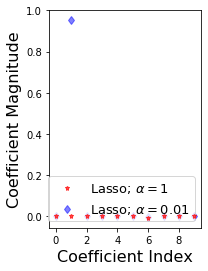

In [54]:

import matplotlib.pyplot as plt 
%matplotlib inline 

plt.subplot(1,2,1)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

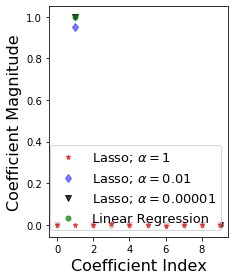

In [55]:
plt.subplot(1,2,2)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [56]:
# 10. Choose the regularization parameter for the Lasso using cross-validation
# on the training set. 

from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=2509)
reg = LassoCV(cv=5, random_state=2509).fit(X, y)
reg.score(X, y)

0.9998485339996583

In [57]:
reg.predict(X[:1,])

array([-285.10022759])

In [65]:
reg = LassoCV(cv=5, random_state=2509).get_params(deep=True)

In [66]:
# split data into train set and test sets
X,y=data[:, :10], data[:,-10]    

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2509)
# split train set into train set proper and validation set

X_train_pr, X_valid, y_train_pr, y_valid = train_test_split(X_train,
y_train, random_state=2509)

print("Sizes of train pr, valid, and test sets:",
X_train_pr.shape[0], X_valid.shape[0], X_test.shape[0])
best_score = 0



Sizes of train pr, valid, and test sets: 248 83 111


In [69]:
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    
        # for each combination of parameters, train an SVM
        LassoCV = CV(alpha=alpha)
        LassoCV.fit(X_train_pr, y_train_pr)
        # evaluate the SVM on the validation set
        score = LassoCV.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_alpha = alpha
            
# rebuild a model on the full training set,
# and evaluate it on the test set
LassoCV = CV(alpha=best_alpha)
LassoCV.fit(X_train, y_train)
test_score = CV.score(X_test, y_test)
print("Best score on validation set:", best_score)
print("Best parameters alpha:", best_alpha)
print("Test set score with best parameter:", test_score)

NameError: name 'CV' is not defined